In [ ]:
!pip install faker 

In [ ]:
!pip install tqdm

## Modelo simples para gerar dados aleatórios com faker

In [7]:
# Gera dados aleatórios 
import faker
import os
import sys
import time
from tqdm import tqdm
import random

# Cria um objeto Faker
fake = faker.Faker()

def format_time(segundos):
    """
    Formata os milisegundos em hora:minuto:segundo
    """
    if segundos < 60:
        return f"{segundos:.3f} segundos"
    elif segundos < 3600:
        minutos, segundos = divmod(segundos, 60)
        return f"{int(minutos)} minutos {int(segundos)} segundos"
    else:
        horas, remainder = divmod(seconds, 3600)
        minutos, segundos = divmod(remainder, 60)
        if minutos == 0:
            return f"{int(horas)} horas {int(segundos)} segundos"
        else:
            return f"{int(horas)} horas {int(minutos)} minutos {int(segundos)} segundos"

# Função para gerar os dados de teste
def generate_test_data(num_rows):
  """
  Gera dados de teste e os escreve em um arquivo.

  Argumentos:
    num_rows: Número de linhas a serem geradas.

  Retorno:
    None.
  """
  with open("data/measurements1.txt", "w", encoding="utf-8") as file:
    for _ in tqdm(range(num_rows)):
      # Gera dados aleatórios
      station_name = fake.city()
      temperature = round(fake.random_element([random.uniform(-50, 50), random.uniform(50, 100)]), 1)

      # Escreve a linha no arquivo
      file.write(f"{station_name};{temperature}\n")

# Solicita o número de linhas ao usuário
num_rows = int(input("Digite o número de linhas a serem geradas: "))

# Gera os dados de teste
start_time = time.time()
generate_test_data(num_rows)
end_time = time.time()

# Exibe o tempo real de geração
tempo_em_segundos = end_time - start_time
print(f"Tempo real de geração:{format_time(tempo_em_segundos)}")

# Converte o tamanho do arquivo para megabytes
file_size = os.path.getsize("data/measurements1.txt")
file_size_mb = file_size / (1024 * 1024)

# Exibe o tamanho do arquivo em megabytes
print(f"Tamanho real do arquivo: {file_size_mb:.2f} Megabytes")

Digite o número de linhas a serem geradas:  1000000


100%|██████████████████████████████████████████| 1000000/1000000 [01:57<00:00, 8520.61it/s]

Tempo real de geração:1 minutos 57 segundos
Tamanho real do arquivo: 17.36 Megabytes


## Modelo para gerar dados aleatórios com faker e multiprocessing.

In [8]:
import faker
import os
import sys
import time
import random
from tqdm import tqdm
from multiprocessing import Pool

# Cria um objeto Faker
fake = faker.Faker()

# Formata o tempo.
def format_time(segundos):
    """
    Formata os milisegundos em hora:minuto:segundo
    """
    if segundos < 60:
        return f"{segundos:.3f} segundos"
    elif segundos < 3600:
        minutos, segundos = divmod(segundos, 60)
        return f"{int(minutos)} minutos {int(segundos)} segundos"
    else:
        horas, remainder = divmod(seconds, 3600)
        minutos, segundos = divmod(remainder, 60)
        if minutos == 0:
            return f"{int(horas)} horas {int(segundos)} segundos"
        else:
            return f"{int(horas)} horas {int(minutos)} minutos {int(segundos)} segundos"

# Função para gerar dados de teste
def generate_test_data(num_rows, chunk_size):
  """
  Gera dados de teste e os escreve em um arquivo.

  Argumentos:
    num_rows: Número de linhas a serem geradas.
    chunk_size: Tamanho do bloco de dados a ser gerado por cada thread.

  Retorno:
    None.
  """
  with open("data/measurements.txt", "w", encoding="utf-8") as file:
    for i in tqdm(range(0, num_rows, chunk_size)):
      # Gera um bloco de dados
      data_chunk = []
      for _ in range(chunk_size):
        station_name = fake.city()
        temperature = round(fake.random_element([random.uniform(-50, 50), random.uniform(50, 100)]), 1)
        data_chunk.append(f"{station_name};{temperature}\n")

      # Escreve o bloco de dados no arquivo
      file.writelines(data_chunk)

# Solicita o número de linhas ao usuário
num_rows = int(input("Digite o número de linhas a serem geradas: "))

# Define o tamanho do bloco de dados
chunk_size = 10_000  # Ajuste este valor de acordo com a sua memória disponível

# Número de threads
num_workers = os.cpu_count()

# Gera os dados de teste em paralelo
start_time = time.time()
with Pool(num_workers) as pool:
  pool.starmap(generate_test_data, [(num_rows, chunk_size)])
end_time = time.time()

# Exibe o tempo real de geração
tempo_em_segundos = end_time - start_time
print(f"Tempo real de geração:{format_time(tempo_em_segundos)}")

# Exibe o tamanho real do arquivo
file_size = os.path.getsize("data/measurements.txt")

# Converte o tamanho do arquivo para megabytes
file_size_mb = file_size / (1024 * 1024)

# Exibe o tamanho do arquivo em megabytes
print(f"Tamanho real do arquivo: {file_size_mb:.2f} Megabytes")

Digite o número de linhas a serem geradas:  1000000


100%|████████████████████████████████████████████████████| 100/100 [01:46<00:00,  1.07s/it]


Tempo real de geração:1 minutos 47 segundos
Tamanho real do arquivo: 17.36 Megabytes


## Scrip python para gerar dados aleatórios
* **O script foi retirado do desafio [The One Billion Row Challenge](https://github.com/gunnarmorling/1brc), originalmente proposto para Java.**

In [5]:
# Based on https://github.com/gunnarmorling/1brc/blob/main/src/main/java/dev/morling/onebrc/CreateMeasurements.java

import os
import sys
import random
import time


def check_args(file_args):
    """
    Sanity checks out input and prints out usage if input is not a positive integer
    """
    try:
        if len(file_args) != 2 or int(file_args[1]) <= 0:
            raise Exception()
    except:
        print("Usage:  create_measurements.sh <positive integer number of records to create>")
        print("        You can use underscore notation for large number of records.")
        print("        For example:  1_000_000_000 for one billion")
        exit()


def build_weather_station_name_list():
    """
    Grabs the weather station names from example data provided in repo and dedups
    """
    station_names = []
    with open('data/weather_stations.csv', 'r') as file:
        file_contents = file.read()
    for station in file_contents.splitlines():
        if "#" in station:
            next
        else:
            station_names.append(station.split(';')[0])
    return list(set(station_names))


def convert_bytes(num):
    """
    Convert bytes to a human-readable format (e.g., KiB, MiB, GiB)
    """
    for x in ['bytes', 'KiB', 'MiB', 'GiB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0


def format_elapsed_time(seconds):
    """
    Format elapsed time in a human-readable format
    """
    if seconds < 60:
        return f"{seconds:.3f} seconds"
    elif seconds < 3600:
        minutes, seconds = divmod(seconds, 60)
        return f"{int(minutes)} minutes {int(seconds)} seconds"
    else:
        hours, remainder = divmod(seconds, 3600)
        minutes, seconds = divmod(remainder, 60)
        if minutes == 0:
            return f"{int(hours)} hours {int(seconds)} seconds"
        else:
            return f"{int(hours)} hours {int(minutes)} minutes {int(seconds)} seconds"


def estimate_file_size(weather_station_names, num_rows_to_create):
    """
    Tries to estimate how large a file the test data will be
    """
    total_name_bytes = sum(len(s.encode("utf-8")) for s in weather_station_names)
    avg_name_bytes = total_name_bytes / float(len(weather_station_names))

    # avg_temp_bytes = sum(len(str(n / 10.0)) for n in range(-999, 1000)) / 1999
    avg_temp_bytes = 4.400200100050025

    # add 2 for separator and newline
    avg_line_length = avg_name_bytes + avg_temp_bytes + 2

    human_file_size = convert_bytes(num_rows_to_create * avg_line_length)

    return f"Estimated max file size is:  {human_file_size}."


def build_test_data(weather_station_names, num_rows_to_create):
    """
    Generates and writes to file the requested length of test data
    """
    start_time = time.time()
    coldest_temp = -99.9
    hottest_temp = 99.9
    station_names_10k_max = random.choices(weather_station_names, k=10_000)
    batch_size = 10000 # instead of writing line by line to file, process a batch of stations and put it to disk
    chunks = num_rows_to_create // batch_size
    print('Building test data...')

    try:
        with open("data/measurements1.txt", 'w') as file:
            progress = 0
            for chunk in range(chunks):
                
                batch = random.choices(station_names_10k_max, k=batch_size)
                prepped_deviated_batch = '\n'.join([f"{station};{random.uniform(coldest_temp, hottest_temp):.1f}" for station in batch]) # :.1f should quicker than round on a large scale, because round utilizes mathematical operation
                file.write(prepped_deviated_batch + '\n')
                
                # Update progress bar every 1%
                if (chunk + 1) * 100 // chunks != progress:
                    progress = (chunk + 1) * 100 // chunks
                    bars = '=' * (progress // 2)
                    sys.stdout.write(f"\r[{bars:<50}] {progress}%")
                    sys.stdout.flush()
        sys.stdout.write('\n')
    except Exception as e:
        print("Something went wrong. Printing error info and exiting...")
        print(e)
        exit()
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    file_size = os.path.getsize("data/measurements1.txt")
    human_file_size = convert_bytes(file_size)
 
    print("Test data successfully written to data/measurements1.txt")
    print(f"Actual file size:  {human_file_size}")
    print(f"Elapsed time: {format_elapsed_time(elapsed_time)}")


def main():
    """
    main program function
    """
    num_rows_to_create = 1_000_000
    weather_station_names = []
    weather_station_names = build_weather_station_name_list()
    print(estimate_file_size(weather_station_names, num_rows_to_create))
    build_test_data(weather_station_names, num_rows_to_create)
    print("Test data build complete.")


if __name__ == "__main__":
    main()
exit()

### Conclusão
* **O modelo para gerar dados com o faker se saiu extremamente lento em comparação ao script do [Gunnar Morling](https://github.com/gunnarmorling) acima.**

## Gerando 1 bilhão de linhas:

In [6]:
# gerando 1 bilhão de linhas
num_rows_to_create = 1_000_000_000
weather_station_names = []
weather_station_names = build_weather_station_name_list()
print(estimate_file_size(weather_station_names, num_rows_to_create))
build_test_data(weather_station_names, num_rows_to_create)
print("Test data build complete.")




Estimated max file size is:  14.8 GiB.
Building test data...
[==================================================] 100%
Test data successfully written to data/measurements.txt
Actual file size:  14.9 GiB
Elapsed time: 15 minutes 3 seconds
Test data build complete.


## Decoradores

In [1]:
# Criando um decorator para calcular o tempo de processamento
def timer(func):
    import time
    # Formata o tempo.
    def format_time(segundos: int): 
        """
        Formata os milisegundos em hora:minuto:segundo
        """
        if segundos < 60:
            return f"{segundos:.3f} segundos"
        elif segundos < 3600:
            minutos, segundos = divmod(segundos, 60)
            return f"{int(minutos)} minutos {int(segundos)} segundos"
        else:
            horas, remainder = divmod(seconds, 3600)
            minutos, segundos = divmod(remainder, 60)
            if minutos == 0:
                return f"{int(horas)} horas {int(segundos)} segundos"
            else:
                return f"{int(horas)} horas {int(minutos)} minutos {int(segundos)} segundos"  

    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        tempo_em_segundos = end - start       
        # Exibe o tempo real de geração    
        print(f"{func.__name__} Tempo de processamento:{format_time(tempo_em_segundos)}")   
        #print(type(format_time(tempo_em_segundos)))
        return result
    return wrapper


* **Decorator para salvar os resultado em um csv**.

In [1]:
def timer(func):
    import time
    import csv
    
    def format_time(segundos: int): 
        """
        Formata os milisegundos em hora:minuto:segundo
        """
        if segundos < 60:
            return f"{segundos:.3f} segundos"
        elif segundos < 3600:
            minutos, segundos = divmod(segundos, 60)
            return f"{int(minutos)} minutos {int(segundos)} segundos"
        else:
            horas, remainder = divmod(seconds, 3600)
            minutos, segundos = divmod(remainder, 60)
            if minutos == 0:
                return f"{int(horas)} horas {int(segundos)} segundos"
            else:
                return f"{int(horas)} horas {int(minutos)} minutos {int(segundos)} segundos"
    
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        tempo_em_segundos = end - start
        tempo_formatado = format_time(tempo_em_segundos)
        
        # Salvando o nome da função e o tempo de execução em um arquivo CSV
        with open('tempos_execucao.csv', 'a', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow([func.__name__, tempo_formatado])
        
        print(f"{func.__name__} Tempo de processamento: {tempo_formatado}")   
        return result
    return wrapper


## Pandas - min, max e mean em 1 bilhão de linhas

In [ ]:
# Instalando a lib pandas.
!poetry add pandas

In [1]:
# Script para min, max e mean de um bilhão de linhas com pandas.
import pandas as pd
import time
from multiprocessing import Pool, cpu_count
from tqdm import tqdm  # importa o tqdm para barra de progresso

CONCURRENCY = cpu_count()

total_linhas = 1_000_000_000  # Total de linhas conhecido
chunksize = 100_000_000  # Define o tamanho do chunk
filename = "data/measurements.txt"  # Certifique-se de que este é o caminho correto para o arquivo

# Formata o tempo.
def format_time(segundos):
    """
    Formata os milisegundos em hora:minuto:segundo
    """
    if segundos < 60:
        return f"{segundos:.3f} segundos"
    elif segundos < 3600:
        minutos, segundos = divmod(segundos, 60)
        return f"{int(minutos)} minutos {int(segundos)} segundos"
    else:
        horas, remainder = divmod(seconds, 3600)
        minutos, segundos = divmod(remainder, 60)
        if minutos == 0:
            return f"{int(horas)} horas {int(segundos)} segundos"
        else:
            return f"{int(horas)} horas {int(minutos)} minutos {int(segundos)} segundos"

def process_chunk(chunk):
    # Agrega os dados dentro do chunk usando Pandas
    aggregated = chunk.groupby('station')['measure'].agg(['min', 'max', 'mean']).reset_index()
    return aggregated

def create_df_with_pandas(filename, total_linhas, chunksize=chunksize):
    total_chunks = total_linhas // chunksize + (1 if total_linhas % chunksize else 0)
    results = []

    with pd.read_csv(filename, sep=';', header=None, names=['station', 'measure'], chunksize=chunksize) as reader:
        # Envolvendo o iterador com tqdm para visualizar o progresso
        with Pool(CONCURRENCY) as pool:
            for chunk in tqdm(reader, total=total_chunks, desc="Processando"):
                # Processa cada chunk em paralelo
                result = pool.apply_async(process_chunk, (chunk,))
                results.append(result)

            results = [result.get() for result in results]

    final_df = pd.concat(results, ignore_index=True)

    final_aggregated_df = final_df.groupby('station').agg({
        'min': 'min',
        'max': 'max',
        'mean': 'mean'
    }).reset_index().sort_values('station')

    return final_aggregated_df

if __name__ == "__main__":
    import time

    print("Iniciando o processamento do arquivo.")
    start_time = time.time()
    df = create_df_with_pandas(filename, total_linhas, chunksize)
    end_time = time.time()
    tempo_em_segundos = end_time - start_time
    print(df.head())
    # Exibe o tempo real de geração    
    print(f"Tempo de processamento:{format_time(tempo_em_segundos)}")


Iniciando o processamento do arquivo.


Processando: 100%|█████████████████████████████████████████| 10/10 [09:20<00:00, 56.07s/it]


       station   min   max      mean
0     Aabenraa -99.9  99.9 -0.061535
1       Aalten -99.9  99.9 -0.161205
2    Abadiânia -99.9  99.9 -0.051514
3     Abalessa -99.9  99.9  0.211034
4  Abangaritos -99.9  99.9  0.066196
Tempo de processamento:-1709939632.573 segundos


## Polars - min, max e mean em 1 bilhão de linhas

In [ ]:
# Instalando a lib polars
!poetry add polars

In [2]:
import polars as pl
@timer
def create_polars_df(): 
    pl.Config.set_streaming_chunk_size(5000000)
    # Leitura do arquivo CSV e definição do schema
    return (pl.scan_csv("data/measurements.txt", separator=";", has_header=False,
                        schema={"station": pl.String, "measure": pl.Float64})
                        .group_by("station").agg(
                                                 max_temp=pl.col("measure").max(),
                                                 min_temp=pl.col("measure").min(),
                                                 mean_temp=pl.col("measure").mean()
                                                ).sort("station").collect(streaming=True)
           )   
if __name__ == "__main__":    
    df = create_polars_df()
    print(df)
   


create_polars_df Tempo de processamento: 30.272 segundos
shape: (8_836, 4)
┌────────────────┬──────────┬──────────┬───────────┐
│ station        ┆ max_temp ┆ min_temp ┆ mean_temp │
│ ---            ┆ ---      ┆ ---      ┆ ---       │
│ str            ┆ f64      ┆ f64      ┆ f64       │
╞════════════════╪══════════╪══════════╪═══════════╡
│ Aabenraa       ┆ 99.9     ┆ -99.9    ┆ -0.062295 │
│ Aalten         ┆ 99.9     ┆ -99.9    ┆ -0.161752 │
│ Abadiânia      ┆ 99.9     ┆ -99.9    ┆ -0.052772 │
│ Abalessa       ┆ 99.9     ┆ -99.9    ┆ 0.211089  │
│ Abangaritos    ┆ 99.9     ┆ -99.9    ┆ 0.063772  │
│ …              ┆ …        ┆ …        ┆ …         │
│ ’Aïn Abessa    ┆ 99.9     ┆ -99.9    ┆ -0.013338 │
│ ’Aïn Azel      ┆ 99.9     ┆ -99.9    ┆ -0.040762 │
│ ’Aïn Roua      ┆ 99.9     ┆ -99.9    ┆ -0.026898 │
│ ’s-Gravenzande ┆ 99.9     ┆ -99.9    ┆ -0.080973 │
│ ’s-Heerenberg  ┆ 99.9     ┆ -99.9    ┆ 0.168265  │
└────────────────┴──────────┴──────────┴───────────┘


## Duckdb - min, max e mean em 1 bilhão de linhas

In [ ]:
!poetry add duckdb

In [3]:
import duckdb
@timer
def create_duckdb():
    duckdb.sql("""
        SELECT station,
            MIN(measure) AS min_temperature,
            CAST(AVG(measure) AS DECIMAL()) AS mean_temperature,
            MAX(measure) AS max_temperature
        FROM read_csv("data/measurements.txt", AUTO_DETECT=FALSE, sep=';', columns={'station':VARCHAR, 'measure': 'DECIMAL'})
        GROUP BY station
        ORDER BY station
    """).show()

if __name__ == "__main__":
    create_duckdb()   

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────┬─────────────────┬──────────────────┬─────────────────┐
│     station     │ min_temperature │ mean_temperature │ max_temperature │
│     varchar     │  decimal(18,3)  │  decimal(18,3)   │  decimal(18,3)  │
├─────────────────┼─────────────────┼──────────────────┼─────────────────┤
│ Aabenraa        │         -99.900 │           -0.062 │          99.900 │
│ Aalten          │         -99.900 │           -0.162 │          99.900 │
│ Abadiânia       │         -99.900 │           -0.053 │          99.900 │
│ Abalessa        │         -99.900 │            0.211 │          99.900 │
│ Abangaritos     │         -99.900 │            0.064 │          99.900 │
│ Abano Terme     │         -99.900 │            0.172 │          99.900 │
│ Abaré           │         -99.900 │           -0.267 │          99.900 │
│ Abbeville       │         -99.900 │            0.074 │          99.900 │
│ Abbiategrasso   │         -99.900 │           -0.195 │          99.900 │
│ Abbots Langley  │      

In [9]:
import duckdb
@timer
def create_duckdb(): 
    conn = duckdb.connect(':memory:')
    start_time = time.time()
    display(conn.execute("""
            SELECT station,
                MIN(measure) AS min_temperature,
                CAST(AVG(measure) AS DECIMAL()) AS mean_temperature,
                MAX(measure) AS max_temperature
            FROM read_csv("data/measurements.txt", AUTO_DETECT=FALSE, sep=';', columns={'station':VARCHAR, 'measure': 'DECIMAL'})
            GROUP BY station
            ORDER BY station
        """).df())
    
if __name__ == "__main__":
    create_duckdb()   

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,station,min_temperature,mean_temperature,max_temperature
0,Aabenraa,-99.9,-0.062,99.9
1,Aalten,-99.9,-0.162,99.9
2,Abadiânia,-99.9,-0.053,99.9
3,Abalessa,-99.9,0.211,99.9
4,Abangaritos,-99.9,0.064,99.9
...,...,...,...,...
8831,’Aïn Abessa,-99.9,-0.013,99.9
8832,’Aïn Azel,-99.9,-0.041,99.9
8833,’Aïn Roua,-99.9,-0.027,99.9
8834,’s-Gravenzande,-99.9,-0.081,99.9


create_duckdb Tempo de processamento:19.675 segundos


In [9]:
display(conn.execute('SHOW TABLES').df())

,name
0,measurements


In [10]:
display(conn.execute('Select * from measurements limit 10').df())

,station,measure
0,Uppalapādu,-29.9
1,Kaman,-34.0
2,Tamu,-40.2
3,Quillabamba,50.6
4,Jabuticabal,15.8
5,Kilibo,-98.4
6,Tillaivilāgam,48.3
7,Ensenada,97.4
8,Indio,64.6
9,Buxton,-54.7


In [30]:
conn.close()

## Dask - min, max e mean em 1 bilhão de linhas

In [ ]:
#necessário Instalar.
!pip install dask-expr

In [4]:
import dask
dask.config.set({'dataframe.query-planning': True})
import dask.dataframe as dd
@timer
def create_dask():    
    # Ler o arquivo txt diretamente em um DataFrame Dask
    df = dd.read_csv('data/measurements.txt', delimiter=';', header=None, names=['station', 'measure'])
    # min, max, e mean pela cidade ordenado pelo index
    return display(df.groupby('station').agg({'measure': ['max','min','mean']}).compute().sort_index())

if __name__ == "__main__":
    create_dask()  


measure                
                   max   min      mean
station                               
Aabenraa          99.9 -99.9 -0.062295
Aalten            99.9 -99.9 -0.161752
Abadiânia         99.9 -99.9 -0.052772
Abalessa          99.9 -99.9  0.211089
Abangaritos       99.9 -99.9  0.063772
...                ...   ...       ...
’Aïn Abessa       99.9 -99.9 -0.013338
’Aïn Azel         99.9 -99.9 -0.040762
’Aïn Roua         99.9 -99.9 -0.026898
’s-Gravenzande    99.9 -99.9 -0.080973
’s-Heerenberg     99.9 -99.9  0.168265

[8836 rows x 3 columns]

create_dask Tempo de processamento: 6 minutos 31 segundos


In [13]:
import dask
dask.config.set({'dataframe.query-planning': True})
import dask.dataframe as dd
@timer
def create_dask():    
    # Ler o arquivo txt diretamente em um DataFrame Dask
    df = dd.read_csv('data/measurements.txt', delimiter=';', header=None, names=['station', 'measure'])
    # min, max, e mean pela cidade ordenado pelo index
    print(df.groupby('station').
    agg({'measure': ['max','min','mean']}).
    compute().
    sort_index())
if __name__ == "__main__":
    create_dask() 
    

               measure                
                   max   min      mean
station                               
Aabenraa          99.9 -99.9 -0.062295
Aalten            99.9 -99.9 -0.161752
Abadiânia         99.9 -99.9 -0.052772
Abalessa          99.9 -99.9  0.211089
Abangaritos       99.9 -99.9  0.063772
...                ...   ...       ...
’Aïn Abessa       99.9 -99.9 -0.013338
’Aïn Azel         99.9 -99.9 -0.040762
’Aïn Roua         99.9 -99.9 -0.026898
’s-Gravenzande    99.9 -99.9 -0.080973
’s-Heerenberg     99.9 -99.9  0.168265

[8836 rows x 3 columns]
create_dask Tempo de processamento:7 minutos 47 segundos


## Pyspark - min, max e mean em 1 bilhão de linhas.

In [ ]:
#instalação da lib
!poetry add pyspark

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, min as spark_min, max as spark_max, avg as spark_avg
@timer
def create_pyspark():     
    # Inicializar uma sessão Spark
    spark = SparkSession.builder \
        .appName("Temperature Analysis") \
        .getOrCreate()
    
    # Ler o arquivo CSV diretamente em um DataFrame Spark
    df = spark.read.option("header", "false").option("delimiter", ";").csv("data/measurements.txt") \
        .toDF("City", "Temperature")
    
    # Converter a coluna 'Temperature' para tipo numérico
    df = df.withColumn("Temperature", col("Temperature").cast("float"))
    
    # Calcular estatísticas usando Spark SQL
    statistics = df.groupBy("City") \
        .agg(spark_min("Temperature").alias("Min Temperature"),
             spark_max("Temperature").alias("Max Temperature"),
             spark_avg("Temperature").alias("Avg Temperature"))
    
    # Ordenar as estatísticas pela cidade
    statistics_sorted = statistics.orderBy("City")
    
    # Mostrar as estatísticas
    return statistics_sorted.show()
    
    # Encerrar a sessão Spark
    # spark.stop()

if __name__ == "__main__":
    create_pyspark()  


24/03/13 00:26:24 WARN Utils: Your hostname, DESKTOP-AN64GAS resolves to a loopback address: 127.0.1.1; using 172.25.237.139 instead (on interface eth0)
24/03/13 00:26:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/13 00:26:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------------+---------------+---------------+--------------------+
|          City|Min Temperature|Max Temperature|     Avg Temperature|
+--------------+---------------+---------------+--------------------+
|      Aabenraa|          -99.9|           99.9| -0.0622947488794981|
|        Aalten|          -99.9|           99.9|-0.16175193009676553|
|     Abadiânia|          -99.9|           99.9|-0.05277215372419822|
|      Abalessa|          -99.9|           99.9| 0.21108941553593294|
|   Abangaritos|          -99.9|           99.9| 0.06377211310947027|
|   Abano Terme|          -99.9|           99.9| 0.17194244350252394|
|         Abaré|          -99.9|           99.9| -0.2666045273852838|
|     Abbeville|          -99.9|           99.9| 0.07425508222933982|
| Abbiategrasso|          -99.9|           99.9|-0.19547850239845785|
|Abbots Langley|          -99.9|           99.9| 0.20737068497627278|
|      Abdulino|          -99.9|           99.9|  0.1269626020386111|
|      Aberdare|    

## Vaex - min, max e mean em 1 bilhão de linhas.

* **Para utilizar o Vaex foi necessário selecionar outro kernel com python 3.10.13.**

In [2]:
!python --version

Python 3.10.13


In [54]:
import vaex
@timer
def create_vaex(filename):
    # Leitura do arquivo CSV utilizando Vaex
    df = vaex.from_csv(filename, names=['station', 'measure'], sep=';')

    # Cálculo das estatísticas
    combined_results = df.groupby(df['station']).agg({'measure': ['min', 'max', 'mean']})

    # Exibição dos resultados
    return display(combined_results)
   
if __name__ == "__main__":
    filename = "data/measurements1.txt"
    create_vaex(filename)


#,station,measure_min,measure_max,measure_mean
0,South Dana,-45.4,96.7,34.13404255319149
1,Benjaminborough,-47.8,98.0,27.29387755102041
2,New Ashley,-47.9,99.8,39.13777777777778
3,South Angela,-48.5,99.9,45.92227488151659
4,West Pamela,-44.1,95.4,38.808045977011496
...,...,...,...,...
"91,357",New Rickyfort,95.0,95.0,95.0
"91,358",South Ruthfort,41.0,41.0,41.0
"91,359",Lake Biancafort,86.4,86.4,86.4
"91,360",Port Selenamouth,-46.7,-46.7,-46.7


create_vaex Tempo de processamento:0.943 segundos


In [47]:
df = vaex.from_csv('data/measurements.txt', names=['station', 'measure'], sep=';',convert=True,chunk_size=10_000_000 , progress=True)

Converting csv to chunk files
Saved chunk #0 to data/measurements.txt_chunk_0.hdf5
Saved chunk #1 to data/measurements.txt_chunk_1.hdf5
Saved chunk #2 to data/measurements.txt_chunk_2.hdf5
Saved chunk #3 to data/measurements.txt_chunk_3.hdf5
Saved chunk #4 to data/measurements.txt_chunk_4.hdf5
Saved chunk #5 to data/measurements.txt_chunk_5.hdf5
Saved chunk #6 to data/measurements.txt_chunk_6.hdf5
Saved chunk #7 to data/measurements.txt_chunk_7.hdf5
Saved chunk #8 to data/measurements.txt_chunk_8.hdf5
Saved chunk #9 to data/measurements.txt_chunk_9.hdf5
Saved chunk #10 to data/measurements.txt_chunk_10.hdf5
Saved chunk #11 to data/measurements.txt_chunk_11.hdf5
Saved chunk #12 to data/measurements.txt_chunk_12.hdf5
Saved chunk #13 to data/measurements.txt_chunk_13.hdf5
Saved chunk #14 to data/measurements.txt_chunk_14.hdf5
Saved chunk #15 to data/measurements.txt_chunk_15.hdf5
Saved chunk #16 to data/measurements.txt_chunk_16.hdf5
Saved chunk #17 to data/measurements.txt_chunk_17.hdf5


In [56]:
import vaex
@timer
def create_vaex(filename):
    # Leitura do arquivo CSV utilizando Vaex
    df = vaex.open(filename)

    # Cálculo das estatísticas
    combined_results = df.groupby(df['station']).agg({'measure': ['min', 'max', 'mean']})
    
    # Ordenar por 'station'
    combined_results = combined_results.sort(by='station')

    # Exibição dos resultados
    return display(combined_results)
   
if __name__ == "__main__":
    filename = "data/measurements.txt.hdf5"
    create_vaex(filename)


#,station,measure_min,measure_max,measure_mean
0,Aabenraa,-99.9,99.9,-0.062294754104918
1,Aalten,-99.9,99.9,-0.16175191675246645
2,Abadiânia,-99.9,99.9,-0.0527721562105517
3,Abalessa,-99.9,99.9,0.21108942210476792
4,Abangaritos,-99.9,99.9,0.06377211442610778
...,...,...,...,...
"8,831",’Aïn Abessa,-99.9,99.9,-0.013338384996559474
"8,832",’Aïn Azel,-99.9,99.9,-0.040762228668600346
"8,833",’Aïn Roua,-99.9,99.9,-0.02689839143166584
"8,834",’s-Gravenzande,-99.9,99.9,-0.0809733627077911


create_vaex Tempo de processamento:47.454 segundos


## cuDF com pandas via GPU

In [3]:
#verificando a versão do python para esse estudo.
!python --version

Python 3.11.3


In [37]:
# Verificando se o ambiente virtual foi setado corretamente.
import site
site.getsitepackages()

['/home/jcnok/bootcamps/bootcamp-jornada-de-dados_2024/.venv/lib/python3.11/site-packages']

* **Para a leitura para 10 milhões de linha foi extremamente rápido, porém para 1 bilhão a memória não suportou.**

In [42]:
import cudf
@timer
def create_cudf(filename):
    
    # Carregar o arquivo CSV e criar os cabeçalhos 'station' e 'measure'
    df = cudf.read_csv(filename, header=None, sep=';', names=['station', 'measure'])
    
    # Agrupar por 'station' e calcular o 'min', 'max' e 'mean' da coluna 'measure'
    grouped_df = df.groupby('station').agg({'measure': ['min', 'max', 'mean']})
    
    # Ordenar o DataFrame pelo índice (station)
    result = grouped_df.sort_index()     
    
    # retorna o resultado
    return print(result)

if __name__ == "__main__":
    filename = "data/measurements1.txt"
    create_cudf(filename)


             measure                 
                 min   max       mean
station                              
Aaronberg      -48.6  99.4  37.065909
Aaronborough   -46.4  98.4  38.725000
Aaronburgh     -45.4  92.0  33.942000
Aaronbury      -47.3  98.7  53.363636
Aaronchester   -49.9  98.8  43.383333
...              ...   ...        ...
Zunigastad     -13.7  57.8  17.450000
Zunigaton      -44.7  86.1  29.414286
Zunigatown      45.2  99.4  68.266667
Zunigaview      -4.1  86.5  60.760000
Zunigaville     -2.1  57.1  38.450000

[91362 rows x 3 columns]
create_cudf Tempo de processamento:0.163 segundos


In [22]:
%%time
import dask_cudf as dc

# Carregar o arquivo csv em um dataframe dask_cudf
df = dc.read_csv('data/measurements.txt',sep=';', header=None, names=['station', 'measure'], dtype=['str', 'float32'], blocksize='1024 Mib')

# Agrupar pela coluna 'station' e calcular min, max e mean da coluna 'measure'
grouped_df = df.groupby('station').agg({'measure': ['min', 'max', 'mean']}).compute()

# Ordenar pelo 'station'
sorted_df = grouped_df.sort_index()

# Imprimir as 5 primeiras e últimas linhas
display(sorted_df)
#print(sorted_df.tail(5))


measure                     
                      min        max      mean
station                                       
Aabenraa       -99.900002  99.900002 -0.062294
Aalten         -99.900002  99.900002 -0.161752
Abadiânia      -99.900002  99.900002 -0.052772
Abalessa       -99.900002  99.900002  0.211090
Abangaritos    -99.900002  99.900002  0.063772
...                   ...        ...       ...
’Aïn Abessa    -99.900002  99.900002 -0.013338
’Aïn Azel      -99.900002  99.900002 -0.040762
’Aïn Roua      -99.900002  99.900002 -0.026899
’s-Gravenzande -99.900002  99.900002 -0.080973
’s-Heerenberg  -99.900002  99.900002  0.168265

[8836 rows x 3 columns]

CPU times: user 6.88 s, sys: 991 ms, total: 7.87 s
Wall time: 54.8 s


## Dask_cudf com GPU

In [43]:
# Definindo a quantidad de workers, geralmente a mesma quantidade de threads ou nucleos para processamento em CPU
# Informa os threads da maquina.
from multiprocessing import cpu_count
cpu_count()

24

In [8]:
dask.config.set({'dataframe.query-planning': True})

In [11]:
# Definindo o cluster para usar gpu.ascii

In [2]:
from dask.distributed import Client
from dask_cuda import LocalCUDACluster
# create a local CUDA cluster
cluster = LocalCUDACluster()
client = Client(cluster)


/home/jcnok/bootcamps/bootcamp-jornada-de-dados_2024/.venv/lib/python3.11/site-packages/dask_cuda/utils.py:170: UserWarning: Cannot get CPU affinity for device with index 0, setting default affinity
  warnings.warn(


In [3]:
#Exibe o link para monitorar o cluster criado;
cluster.get_client()

Connection method: Cluster object,Cluster type: dask_cuda.LocalCUDACluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 1,Total memory: 7.68 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40379,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 1
Started: 1 minute ago,Total memory: 7.68 GiB
Comm: tcp://127.0.0.1:34361,Total threads: 1
Dashboard: http://127.0.0.1:34505/status,Memory: 7.68 GiB
Nanny: tcp://127.0.0.1:38293,


In [ ]:
# no bash pode digitar o comando abaixo para acompanhar o uso da gpu:
$ watch -n 1 nvidia-smi

In [5]:
import dask_cudf as dc
@timer
def dask_cudf_1024():
    # Carregar o arquivo csv em um dataframe dask_cudf
    df = dc.read_csv('data/measurements.txt',sep=';', header=None, names=['station', 'measure'], dtype=['str', 'float32'], blocksize='1024 Mib')
    
    # Agrupar pela coluna 'station' e calcular min, max e mean da coluna 'measure'
    grouped_df = df.groupby('station').agg({'measure': ['min', 'max', 'mean']}).compute()
    
    # Ordenar pelo 'station'
    sorted_df = grouped_df.sort_index()
    
    # retorna o dataframe
    return sorted_df
    
dask_cudf_1024()

dask_cudf_1024 Tempo de processamento: 52.547 segundos


measure                     
                      min        max      mean
station                                       
Aabenraa       -99.900002  99.900002 -0.062294
Aalten         -99.900002  99.900002 -0.161752
Abadiânia      -99.900002  99.900002 -0.052772
Abalessa       -99.900002  99.900002  0.211090
Abangaritos    -99.900002  99.900002  0.063772
...                   ...        ...       ...
’Aïn Abessa    -99.900002  99.900002 -0.013338
’Aïn Azel      -99.900002  99.900002 -0.040762
’Aïn Roua      -99.900002  99.900002 -0.026899
’s-Gravenzande -99.900002  99.900002 -0.080973
’s-Heerenberg  -99.900002  99.900002  0.168265

[8836 rows x 3 columns]

In [4]:
import psutil

# Obtém o processo JupyterLab
process = psutil.Process()

# Obtém a quantidade total de memória alocada para o processo em bytes
memoria_total = process.memory_info().rss

# Converta bytes para megabytes para uma leitura mais compreensível
memoria_total_mb = memoria_total / (1024 * 1024)

print(f"A memória total alocada para o JupyterLab é de aproximadamente {memoria_total_mb:.2f} MB")


A memória total alocada para o JupyterLab é de aproximadamente 734.02 MB


In [ ]:
# muito util pois imprime os parametros do método.
??cudf.read_csv

In [7]:
# Nova tentatica agora com blocksize de 256 MiB
import dask_cudf as dc
@timer
def dask_cudf_256():
    # Carregar o arquivo csv em um dataframe dask_cudf
    df = dc.read_csv('data/measurements.txt',
                     sep=';', header=None,
                     names=['station', 'measure'], 
                     dtype=['str', 'float32'],
                     blocksize='256 Mib')
    
    # Agrupar pela coluna 'station' e calcular min, max e mean da coluna 'measure'
    grouped_df = df.groupby('station').agg({'measure': ['min', 'max', 'mean']}).compute()
    
    # Ordenar pelo 'station'
    sorted_df = grouped_df.sort_index()
    
    # Imprimir as 5 primeiras e últimas linhas
    return sorted_df
    #print(sorted_df.tail(5))
dask_cudf_256()

dask_cudf_256 Tempo de processamento: 36.781 segundos


measure                     
                      min        max      mean
station                                       
Aabenraa       -99.900002  99.900002 -0.062295
Aalten         -99.900002  99.900002 -0.161752
Abadiânia      -99.900002  99.900002 -0.052772
Abalessa       -99.900002  99.900002  0.211089
Abangaritos    -99.900002  99.900002  0.063772
...                   ...        ...       ...
’Aïn Abessa    -99.900002  99.900002 -0.013338
’Aïn Azel      -99.900002  99.900002 -0.040762
’Aïn Roua      -99.900002  99.900002 -0.026899
’s-Gravenzande -99.900002  99.900002 -0.080974
’s-Heerenberg  -99.900002  99.900002  0.168265

[8836 rows x 3 columns]

* **Alterando para 256 MiB a performance melhorou, mas ainda assim bem longe de superar o DuckDB.**
* **Conforme o benchmarch da documentação ele tem capacidade de superar o sgdb. Talvez alguma configuração pois ainda não li toda a documentação.**

## Setup and install RAPIDs

In [1]:
!nvidia-smi

Tue Mar 12 18:27:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.40.06              Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     On  |   00000000:03:00.0  On |                  N/A |
| 34%   42C    P8             16W /  200W |     487MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

* **Veja que interessante o %%load_ext cudf.pandas converte a maioria dos comandos do pandas para processamento em gpu.** 

In [7]:
# Carrega o cudf para pandas
%load_ext cudf.pandas
import pandas as pd

In [12]:
# verificando se o cudf foi setado no pandas
pd

<module 'pandas' (ModuleAccelerator(fast=cudf, slow=pandas))>

In [13]:
# verificando se o método read do pandas está em modo fast.
type(pd.read_csv)

cudf.pandas.fast_slow_proxy._FunctionProxy

In [11]:
# Carrega o cudf para pandas
%load_ext cudf.pandas
import pandas as pd
@timer
def dc_read():
    # Carregar o arquivo csv em um dataframe dask_cudf
    df = pd.read_csv('data/measurements1.txt',
                     sep=';', header=None,
                     names=['station', 'measure'], 
                     dtype=['str', 'float32'])
    
    # Agrupar pela coluna 'station' e calcular min, max e mean da coluna 'measure'
    grouped_df = df.groupby('station').agg({'measure': ['min', 'max', 'mean']})
    
    # Ordenar pelo 'station'
    sorted_df = grouped_df.sort_index()    
    
    return sorted_df
dc_read()


The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas
dc_read Tempo de processamento:0.166 segundos


measure                      
                    min        max       mean
station                                      
Aaronberg    -48.599998  99.400002  37.065918
Aaronborough -46.400002  98.400002  38.724998
Aaronburgh   -45.400002  92.000000  33.942002
Aaronbury    -47.299999  98.699997  53.363631
Aaronchester -49.900002  98.800003  43.383333
...                 ...        ...        ...
Zunigastad   -13.700000  57.799999  17.449999
Zunigaton    -44.700001  86.099998  29.414285
Zunigatown    45.200001  99.400002  68.266668
Zunigaview    -4.100000  86.500000  60.759998
Zunigaville   -2.100000  57.099998  38.450001

[91362 rows x 3 columns]

In [57]:
# reinicia o kernel
# @title
get_ipython().kernel.do_shutdown(restart=True)

{'status': 'ok', 'restart': True}

In [7]:
import cudf

Introduction to Dask¶
Dask is a library the allows for parallelized computing. Written in Python, it allows one to compose complex workflows using large data structures like those found in NumPy, Pandas, and cuDF. In the following examples and notebooks, we'll show how to use Dask with cuDF to accelerate common ETL tasks as well as build and train machine learning models like Linear Regression and XGBoost.

To learn more about Dask, check out the documentation here: http://docs.dask.org/en/latest/

Client/Workers
Dask operates by creating a cluster composed of a "client" and multiple "workers". The client is responsible for scheduling work; the workers are responsible for actually executing that work.

Typically, we set the number of workers to be equal to the number of computing resources we have available to us. For CPU based workflows, this might be the number of cores or threads on that particlular machine. For example, we might set n_workers = 8 if we have 8 CPU cores or threads on our machine that can each operate in parallel. This allows us to take advantage of all of our computing resources and enjoy the most benefits from parallelization.

On a system with one or more GPUs, we usually set the number of workers equal to the number of GPUs available to us. Dask is a first class citizen in the world of General Purpose GPU computing and the RAPIDS ecosystem makes it very easy to use Dask with cuDF and XGBoost.

Before we get started with Dask, we need to setup a Local Cluster of workers to execute our work and a Client to coordinate and schedule work for that cluster. As we see below, we can inititate a cluster and client using only few lines of code.


Introdução ao Dask¶ Dask é uma biblioteca que permite computação paralelizada. Escrito em Python, permite compor fluxos de trabalho complexos usando grandes estruturas de dados como as encontradas em NumPy, Pandas e cuDF. Nos exemplos e notebooks a seguir, mostraremos como usar Dask com cuDF para acelerar tarefas comuns de ETL, bem como construir e treinar modelos de aprendizado de máquina como regressão linear e XGBoost. Para saber mais sobre o Dask, confira a documentação aqui: http://docs.dask.org/en/latest/ Client/Workers O Dask opera criando um cluster composto por um "cliente" e vários "trabalhadores". O cliente é responsável pelo agendamento dos trabalhos; os trabalhadores são responsáveis ​​pela execução efetiva desse trabalho. Normalmente, definimos o número de trabalhadores como igual ao número de recursos computacionais que temos disponíveis. Para fluxos de trabalho baseados em CPU, esse pode ser o número de núcleos ou threads naquela máquina específica. Por exemplo, podemos definir n_workers = 8 se tivermos 8 núcleos de CPU ou threads em nossa máquina que podem operar em paralelo. Isso nos permite aproveitar todos os nossos recursos computacionais e aproveitar ao máximo os benefícios da paralelização. Em um sistema com uma ou mais GPUs, normalmente definimos o número de trabalhadores igual ao número de GPUs disponíveis para nós. Dask é um cidadão de primeira classe no mundo da computação GPU de uso geral e o ecossistema RAPIDS torna muito fácil usar o Dask com cuDF e XGBoost. Antes de começarmos com o Dask, precisamos configurar um cluster local de trabalhadores para executar nosso trabalho e um cliente para coordenar e agendar o trabalho para esse cluster. Como vemos abaixo, podemos iniciar um cluster e um cliente usando apenas algumas linhas de código.

In [9]:
import dask; print('Dask Version:', dask.__version__)
from dask.distributed import Client, LocalCluster


# create a local cluster with 4 workers
n_workers = 4
cluster = LocalCluster(n_workers=n_workers)
client = Client(cluster)

Dask Version: 2024.1.1


Let's inspect the client object to view our current Dask status. We should see the IP Address for our Scheduler as well as the the number of workers in our Cluster.

Vamos inspecionar o objeto cliente para visualizar nosso status atual do Dask. Devemos ver o endereço IP do nosso Agendador, bem como o número de trabalhadores no nosso Cluster.

In [10]:
# show current Dask status
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 24,Total memory: 7.68 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43807,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 24
Started: 1 minute ago,Total memory: 7.68 GiB
Comm: tcp://127.0.0.1:44895,Total threads: 6
Dashboard: http://127.0.0.1:41109/status,Memory: 1.92 GiB
Nanny: tcp://127.0.0.1:39471,


You can also see the status and more information at the Dashboard, found at http://<ip_address>/status. This can be ignored now since this is pointing to local machine.

With our client and workers setup, it's time to execute our first program in parallel. We'll define a function called add_5_to_x that takes some value x and adds 5 to it.

Você também pode ver o status e mais informações no Dashboard, encontrado em http://<ip_address>/status. Isso pode ser ignorado agora, pois está apontando para a máquina local. Com a configuração do cliente e dos trabalhadores, é hora de executar nosso primeiro programa em paralelo. Definiremos uma função chamada add_5_to_x que recebe algum valor x e adiciona 5 a ele.

In [11]:
def add_5_to_x(x):
    return x + 5

Next, we'll iterate through our n_workers and create an execution graph, where each worker is responsible for taking its ID and passing it to the function add_5_to_x. For example, the worker with ID 2 will take its ID and pass it to the function add_5_to_x, resulting in the value 7.

A seguir, iremos iterar através de nossos n_workers e criar um gráfico de execução, onde cada trabalhador é responsável por pegar seu ID e passá-lo para a função add_5_to_x. Por exemplo, o trabalhador com ID 2 pegará seu ID e o passará para a função add_5_to_x, resultando no valor 7.

In [12]:
from dask import delayed


addition_operations = [delayed(add_5_to_x)(i) for i in range(n_workers)]
addition_operations

[Delayed('add_5_to_x-4c0ff802-4d66-41b4-adbb-e3e8542532d9'),
 Delayed('add_5_to_x-ea344c11-d675-4f8b-83c7-c96a0e015da7'),
 Delayed('add_5_to_x-093d2c6d-4eb0-41f3-a38d-f73c23653800'),
 Delayed('add_5_to_x-d9af2829-552e-497b-bc61-fca5a643bcf5')]

The above output shows a list of several Delayed objects. An important thing to note is that the workers aren't actually executing these results - we're just defining the execution graph for our client to execute later. The delayed function wraps our function add_5_to_x and returns a Delayed object. This ensures that this computation is in fact "delayed" - or lazily evaluated - and not executed on the spot i.e. when we define it.

Next, let's sum each one of these intermediate results. We can accomplish this by wrapping Python's built-in sum function using our delayed function and storing this in a variable called total.

A saída acima mostra uma lista de vários objetos atrasados. Uma coisa importante a notar é que os trabalhadores não estão realmente executando esses resultados - estamos apenas definindo o gráfico de execução para nosso cliente executar mais tarde. A função atrasada envolve nossa função add_5_to_x e retorna um objeto Atrasado. Isso garante que este cálculo seja de fato "atrasado" - ou avaliado preguiçosamente - e não executado no local, ou seja, quando o definimos. A seguir, vamos somar cada um desses resultados intermediários. Podemos fazer isso agrupando a função sum integrada do Python usando nossa função atrasada e armazenando isso em uma variável chamada total.

In [13]:
total = delayed(sum)(addition_operations)
total

Delayed('sum-230eb00e-b56e-47c5-98b7-4197ebd243c3')

Using the graphviz library, we can use the visualize method of a Delayed object to visualize our current graph.
Usando a biblioteca graphviz, podemos usar o método de visualização de um objeto Delayed para visualizar nosso gráfico atual.

In [16]:
!pip install graphviz -q

In [21]:
import os
try:
    import graphviz
except ModuleNotFoundError:
    os.system('conda install -c conda-forge graphviz -y')
    os.system('conda install -c conda-forge python-graphviz -y')

In [20]:
#total.visualize()

As we mentioned before, none of these results - intermediate or final - have actually been compute. We can compute them using the compute method of our client.
Como mencionamos anteriormente, nenhum desses resultados – intermediários ou finais – foi realmente computado. Podemos calculá-los usando o método de computação do nosso cliente.

In [22]:
from dask.distributed import wait
import time


addition_futures = client.compute(addition_operations, optimize_graph=False, fifo_timeout="0ms")
total_future = client.compute(total, optimize_graph=False, fifo_timeout="0ms")
wait(total_future)  # this will give Dask time to execute the work

DoneAndNotDoneFutures(done={<Future: finished, type: int, key: sum-230eb00e-b56e-47c5-98b7-4197ebd243c3>}, not_done=set())

In [23]:
addition_futures

[<Future: finished, type: int, key: add_5_to_x-4c0ff802-4d66-41b4-adbb-e3e8542532d9>,
 <Future: finished, type: int, key: add_5_to_x-ea344c11-d675-4f8b-83c7-c96a0e015da7>,
 <Future: finished, type: int, key: add_5_to_x-093d2c6d-4eb0-41f3-a38d-f73c23653800>,
 <Future: finished, type: int, key: add_5_to_x-d9af2829-552e-497b-bc61-fca5a643bcf5>]

We can see from the above output that our addition_futures variable is a list of Future objects - not the "actual results" of adding 5 to each of [0, 1, 2, 3]. These Future objects are a promise that at one point a computation will take place and we will be left with a result. Dask is responsible for fulfilling that promise by delegating that task to the appropriate Dask worker and collecting the result.

Let's take a look at our total_future object:

Podemos ver na saída acima que nossa variável add_futures é uma lista de objetos Future - não os "resultados reais" da adição de 5 a cada um de [0, 1, 2, 3]. Esses objetos Future são uma promessa de que em determinado momento ocorrerá um cálculo e teremos um resultado. Dask é responsável por cumprir essa promessa, delegando essa tarefa ao trabalhador Dask apropriado e coletando o resultado. Vamos dar uma olhada em nosso objeto total_future:

In [24]:
print(total_future)
print(type(total_future))

<Future: finished, type: int, key: sum-230eb00e-b56e-47c5-98b7-4197ebd243c3>
<class 'distributed.client.Future'>


Again, we see that this is an object of type Future as well as metadata about the status of the request (i.e. whether it has finished or not), the type of the result, and a key associated with that operation. To collect and print the result of each of these Future objects, we can call the result() method.
Novamente, vemos que este é um objeto do tipo Future, bem como metadados sobre o status da solicitação (ou seja, se ela foi concluída ou não), o tipo de resultado e uma chave associada a essa operação. Para coletar e imprimir o resultado de cada um desses objetos Future, podemos chamar o método result().

In [25]:
addition_results = [future.result() for future in addition_futures]
print('Addition Results:', addition_results)

Addition Results: [5, 6, 7, 8]


Now we see the results that we want from our addition operations. We can also use the simpler syntax of the client.gather method to collect our results.
Agora vemos os resultados que queremos das nossas operações de adição. Também podemos usar a sintaxe mais simples do método client.gather para coletar nossos resultados.

In [25]:
addition_results = client.gather(addition_futures)
total_result = client.gather(total_future)
print('Addition Results:', addition_results)
print('Total Result:', total_result)

Addition Results: [5, 6, 7, 8]
Total Result: 26


Awesome! We just wrote our first distributed workflow.

To confirm that Dask is truly executing in parallel, let's define a function that sleeps for 1 second and returns the string "Success!". In serial, this function should take our 4 workers around 4 seconds to execute.

Incrível! Acabamos de escrever nosso primeiro fluxo de trabalho distribuído. Para confirmar que Dask está realmente executando em paralelo, vamos definir uma função que durma por 1 segundo e retorne a string "Sucesso!". Em série, esta função deve levar cerca de 4 segundos para nossos 4 trabalhadores serem executados.

In [26]:
def sleep_1():
    time.sleep(1)
    return 'Success!'

In [27]:
%%time

for _ in range(n_workers):
    sleep_1()

CPU times: user 331 ms, sys: 91.9 ms, total: 423 ms
Wall time: 4 s


As expected, our process takes about 4 seconds to run. Now let's execute this same workflow in parallel using Dask.
Como esperado, nosso processo leva cerca de 4 segundos para ser executado. Agora vamos executar esse mesmo fluxo de trabalho em paralelo usando Dask.



In [28]:
%%time

# define delayed execution graph
sleep_operations = [delayed(sleep_1)() for _ in range(n_workers)]

# use client to perform computations using execution graph
sleep_futures = client.compute(sleep_operations, optimize_graph=False, fifo_timeout="0ms")

# collect and print results
sleep_results = client.gather(sleep_futures)
print(sleep_results)

['Success!', 'Success!', 'Success!', 'Success!']
CPU times: user 127 ms, sys: 10 ms, total: 137 ms
Wall time: 1.03 s


Using Dask, we see that this whole process takes a little over a second - each worker is executing in parallel!
Usando o Dask, vemos que todo esse processo leva pouco mais de um segundo - cada trabalhador está executando em paralelo!

### Dask Cudf
Let's start by creating a local cluster of workers and a client to interact with that cluster.
Vamos começar criando um cluster local de trabalhadores e um cliente para interagir com esse cluster.

In [29]:
from dask.distributed import Client
from dask_cuda import LocalCUDACluster


# create a local CUDA cluster
cluster = LocalCUDACluster()
client = Client(cluster)
client

/home/jcnok/bootcamps/bootcamp-jornada-de-dados_2024/.venv/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40393 instead
  warnings.warn(
/home/jcnok/bootcamps/bootcamp-jornada-de-dados_2024/.venv/lib/python3.11/site-packages/dask_cuda/utils.py:170: UserWarning: Cannot get CPU affinity for device with index 0, setting default affinity
  warnings.warn(


Connection method: Cluster object,Cluster type: dask_cuda.LocalCUDACluster
Dashboard: http://127.0.0.1:40393/status,
Dashboard: http://127.0.0.1:40393/status,Workers: 1
Total threads: 1,Total memory: 7.68 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37575,Workers: 1
Dashboard: http://127.0.0.1:40393/status,Total threads: 1
Started: Just now,Total memory: 7.68 GiB
Comm: tcp://127.0.0.1:35241,Total threads: 1
Dashboard: http://127.0.0.1:43695/status,Memory: 7.68 GiB
Nanny: tcp://127.0.0.1:37061,


2024-03-12 00:30:05,011 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:48720; closing.
2024-03-12 00:30:05,014 - distributed.scheduler - INFO - Remove worker <WorkerState 'tcp://127.0.0.1:35241', name: 0, status: closing, memory: 3, processing: 0> (stimulus_id='handle-worker-cleanup-1710214205.01484')
2024-03-12 00:30:05,016 - distributed.scheduler - INFO - Lost all workers
2024-03-12 00:30:06,132 - distributed.scheduler - INFO - Scheduler closing due to unknown reason...
2024-03-12 00:30:06,136 - distributed.scheduler - INFO - Scheduler closing all comms


We'll define a function called load_data that will create a cudf.DataFrame with two columns, key and value. The column key will be randomly filled with either a 0 or a 1, with 50% probability of either number being selected. The column value will be randomly filled with numbers sampled from a normal distribution.

Definiremos uma função chamada load_data que criará um cudf.DataFrame com duas colunas, chave e valor. A chave da coluna será preenchida aleatoriamente com 0 ou 1, com 50% de probabilidade de qualquer um dos números ser selecionado. O valor da coluna será preenchido aleatoriamente com números amostrados de uma distribuição normal.

In [30]:
import cudf; print('cuDF Version:', cudf.__version__)
import numpy as np; print('NumPy Version:', np.__version__)


def load_data(n_rows):
    df = cudf.DataFrame()
    random_state = np.random.RandomState(43210)
    df['key'] = random_state.binomial(n=1, p=0.5, size=(n_rows,))
    df['value'] = random_state.normal(size=(n_rows,))
    return df

cuDF Version: 24.04.00a546
NumPy Version: 1.26.4


We'll also define a function head that takes a cudf.DataFrame and returns the first 5 rows.
Também definiremos um cabeçalho de função que recebe cudf.DataFrame e retorna as 5 primeiras linhas.

In [31]:
def head(dataframe):
    return dataframe.head()

We'll define the number of workers as well as the number of rows each dataframe will have.
Definiremos o número de trabalhadores, bem como o número de linhas que cada dataframe terá.


In [33]:
# define the number of workers
n_workers = 1  # feel free to change this depending on how many GPUs you have

# define the number of rows each dataframe will have
n_rows = 125000000  # we'll use 125 million rows in each dataframe

We'll create each dataframe using the delayed operator.
Criaremos cada dataframe usando o operador atrasado.

In [34]:
from dask.delayed import delayed


# create each dataframe using a delayed operation
dfs = [delayed(load_data)(n_rows) for i in range(n_workers)]
dfs

[Delayed('load_data-f841e897-3a26-45fb-8278-a9fe8eec0745')]

Vemos que o resultado desta operação é uma lista de objetos atrasados. É importante notar que estas operações estão “atrasadas” – nada foi computado ainda, ou seja, nossos dados ainda não foram criados! Podemos aplicar a função head a cada um de nossos dataframes "atrasados".

In [35]:
head_dfs = [delayed(head)(df) for df in dfs]
head_dfs

[Delayed('head-3beb5e6e-57b2-4736-9bc3-0c4832d33392')]


Como antes, vemos que o resultado é uma lista de objetos Delayed – uma coisa importante a notar é que nossa “chave”, ou identificador exclusivo para cada operação, mudou. Você deverá ver o nome do cabeçalho da função seguido por um sinal de cerquilha. Por exemplo, pode-se ver: [Delayed('head-8e946db2-feaf-4e79-99ab-f732b6e28461') Delayed('head-eb06bc77-9d5c-4a47-8c01-b5b36710b727')] Novamente, nada foi computado - vamos calcular os resultados e execute o fluxo de trabalho usando o método client.compute().

In [36]:
from dask.distributed import wait


# use the client to compute - this means create each dataframe and take the head
futures = client.compute(head_dfs)
wait(futures)  # this will give Dask time to execute the work before moving to any subsequently defined operations
futures

[<Future: finished, type: cudf.core.dataframe.DataFrame, key: head-3beb5e6e-57b2-4736-9bc3-0c4832d33392>]

We see that our results are a list of futures. Each object in this list tells us a bit information about itself: the status (pending, error, finished), the type of the object, and the key (unique identifief).

We can use the client.gather method to collect the results of each of these futures.

Vemos que nossos resultados são uma lista de futuros. Cada objeto nesta lista nos fornece algumas informações sobre si mesmo: o status (pendente, erro, concluído), o tipo do objeto e a chave (identificação única). Podemos usar o método client.gather para coletar os resultados de cada um desses futuros.

In [37]:
# collect the results
results = client.gather(futures)
results

[   key     value
 0    1  0.689155
 1    0  0.999085
 2    0 -0.277850
 3    1 -1.535017
 4    1 -0.028184]

We see that our results are a list of cuDF DataFrames, each having 2 columns and 5 rows. Let's inspect the first dataframe:
Vemos que nossos resultados são uma lista de DataFrames cuDF, cada um com 2 colunas e 5 linhas. Vamos inspecionar o primeiro dataframe:

In [38]:
# let's inspect the head of the first dataframe
print(results[0])

   key     value
0    1  0.689155
1    0  0.999085
2    0 -0.277850
3    1 -1.535017
4    1 -0.028184


That was a pretty simple example. Let's see how we can use this perform a more complex operation like figuring how many total rows we have across all of our dataframes. We'll define a function called length that will take a cudf.DataFrame and return the first value of the shape attribute i.e. the number of rows for that particular dataframe.

Esse foi um exemplo bem simples. Vamos ver como podemos usar isso para realizar uma operação mais complexa, como descobrir quantas linhas totais temos em todos os nossos dataframes. Definiremos uma função chamada length que pegará um cudf.DataFrame e retornará o primeiro valor do atributo shape, ou seja, o número de linhas para aquele dataframe específico.

In [39]:
def length(dataframe):
    return dataframe.shape[0]

We'll define our operation on the dataframes we've created:
Definiremos nossa operação nos dataframes que criamos:

In [40]:
lengths = [delayed(length)(df) for df in dfs]
lengths

[Delayed('length-fff0b6ca-f3eb-4698-bc09-51d97eae936e')]

And then use Python's built-in sum function to sum all of these lengths.
E então use a função sum integrada do Python para somar todos esses comprimentos.

In [41]:
total_number_of_rows = delayed(sum)(lengths)


At this point, total_number_of_rows hasn't been computed yet. But we can still visualize the graph of operations we've defined using the visualize() method.
Neste ponto, total_number_of_rows ainda não foi calculado. Mas ainda podemos visualizar o gráfico de operações que definimos usando o método visualize().

In [43]:
# total_number_of_rows.visualize()

The graph can be read from bottom to top. We see that for each worker, we will first execute the load_data function to create each dataframe. Then the function length will be applied to each dataframe; the results from these operations on each worker will then be combined into a single result via the sum function.

Let's now execute our workflow and compute a value for the total_number_of_rows variable.

O gráfico pode ser lido de baixo para cima. Vemos que para cada trabalhador, primeiro executaremos a função load_data para criar cada dataframe. Em seguida, o comprimento da função será aplicado a cada dataframe; os resultados dessas operações em cada trabalhador serão então combinados em um único resultado por meio da função soma. Vamos agora executar nosso fluxo de trabalho e calcular um valor para a variável total_number_of_rows.

In [44]:
# use the client to compute the result and wait for it to finish
future = client.compute(total_number_of_rows)
wait(future)
future

<Future: finished, type: int, key: sum-4786aa41-17e6-4928-b8c2-24aa529014a4>

We see that our computation has finished - our result is of type int. We can collect our result using the client.gather() method.
Vemos que nosso cálculo foi concluído – nosso resultado é do tipo int. Podemos coletar nosso resultado usando o método client.gather().

In [45]:
# collect result
result = client.gather(future)
result

125000000

That's all there is to it! We can define even more complex operations and workflows using cuDF DataFrames by using the delayed, wait, client.submit(), and client.gather() workflow.

However, there can sometimes be a drawback from using this pattern. For example, consider a common operation such as a groupby - we might want to group on certain keys and aggregate the values to compute a mean, variance, or even more complex aggregations. Each dataframe is located on a different GPU - and we're not guaranteed that all of the keys necessary for that groupby operation are located on a single GPU i.e. keys may be scattered across multiple GPUs.

To make our problem even more concrete, let's consider the simple operation of grouping on our key column and calculating the mean of the value column. To sovle this problem, we'd have to sort the data and transfer keys and their associated values from one GPU to another - a tricky thing to do using the delayed pattern. In the example below, we'll show an example of this issue with the delayed pattern and motivate why one might consider using the dask_cudf API.

First, let's define a function groupby that takes a cudf.DataFrame, groups by the key column, and calculates the mean of the value column.

Isso é tudo que há para fazer! Podemos definir operações e fluxos de trabalho ainda mais complexos usando cuDF DataFrames usando o fluxo de trabalho atrasado, de espera, client.submit() e client.gather(). No entanto, às vezes pode haver uma desvantagem no uso desse padrão. Por exemplo, considere uma operação comum como groupby - podemos querer agrupar em determinadas chaves e agregar os valores para calcular uma média, variância ou agregações ainda mais complexas. Cada dataframe está localizado em uma GPU diferente - e não temos garantia de que todas as chaves necessárias para essa operação de agrupamento estejam localizadas em uma única GPU, ou seja, as chaves podem estar espalhadas por várias GPUs. Para tornar nosso problema ainda mais concreto, vamos considerar a operação simples de agrupar em nossa coluna-chave e calcular a média da coluna de valor. Para resolver esse problema, teríamos que classificar os dados e transferir chaves e seus valores associados de uma GPU para outra - algo complicado de fazer usando o padrão atrasado. No exemplo abaixo, mostraremos um exemplo desse problema com o padrão atrasado e motivaremos por que alguém pode considerar o uso da API dask_cudf. Primeiro, vamos definir uma função groupby que pega um cudf.DataFrame, agrupa pela coluna-chave e calcula a média da coluna de valor.

In [46]:
def groupby(dataframe):
    return dataframe.groupby('key')['value'].mean()

We'll apply the function groupby to each dataframe using the delayed operation.
Aplicaremos a função groupby a cada dataframe usando a operação atrasada.

In [47]:
groupbys = [delayed(groupby)(df) for df in dfs]

In [48]:
# use the client to compute the result and wait for it to finish
groupby_dfs = client.compute(groupbys)
wait(groupby_dfs)
groupby_dfs

[<Future: finished, type: cudf.core.series.Series, key: groupby-03b5af48-c53f-424f-bebb-06dc1a521cf8>]

In [49]:
results = client.gather(groupby_dfs)
results

[key
 0   -0.000173
 1   -0.000059
 Name: value, dtype: float64]

In [50]:
for i, result in enumerate(results):
    print('cuDF DataFrame:', i)
    print(result)

cuDF DataFrame: 0
key
0   -0.000173
1   -0.000059
Name: value, dtype: float64


This isn't exactly what we wanted though - ideally, we'd get one dataframe where for each unique key (0 and 1), we get the mean of the value column.

We can use the dask_cudf API to help up solve this problem. First we'll import the dask_cudf library and then use the dask_cudf.from_delayed function to convert our list of delayed dataframes to an object of type dask_cudf.core.DataFrame. We'll use this object - distributed_df - along with the dask_cudf API to perform that "tricky" groupby operation.

Porém, isso não é exatamente o que queríamos - idealmente, obteríamos um dataframe onde, para cada chave exclusiva (0 e 1), obteríamos a média da coluna de valor. Podemos usar a API dask_cudf para ajudar a resolver este problema. Primeiro importaremos a biblioteca dask_cudf e depois usaremos a função dask_cudf.from_delayed para converter nossa lista de dataframes atrasados ​​em um objeto do tipo dask_cudf.core.DataFrame. Usaremos este objeto - distribuído_df - junto com a API dask_cudf para realizar aquela operação "complicada" de agrupamento.

In [51]:
import dask_cudf; print('Dask cuDF Version:', dask_cudf.__version__)


# create a distributed cuDF DataFrame using Dask
distributed_df = dask_cudf.from_delayed(dfs)
print('Type:', type(distributed_df))
distributed_df

Dask cuDF Version: 24.04.00a546
Type: <class 'dask_cudf.core.DataFrame'>


,key,value
npartitions=1,,
,int64,float64
,...,...


The dask_cudf API closely mirrors the cuDF API. We can use a groupby similar to how we would with cuDF - but this time, our operation is distributed across multiple GPUs!
A API dask_cudf reflete de perto a API cuDF. Podemos usar um groupby semelhante ao que faríamos com cuDF - mas desta vez, nossa operação é distribuída por várias GPUs!

In [ ]:
result = distributed_df.groupby('key')['value'].mean().compute()
result

Lastly, let's examine our result!

Por último, vamos examinar nosso resultado!

In [54]:
print(result)

key
0   -0.000173
1   -0.000059
Name: value, dtype: float64


## Resultados:

In [ ]:
!poetry add matplotlib

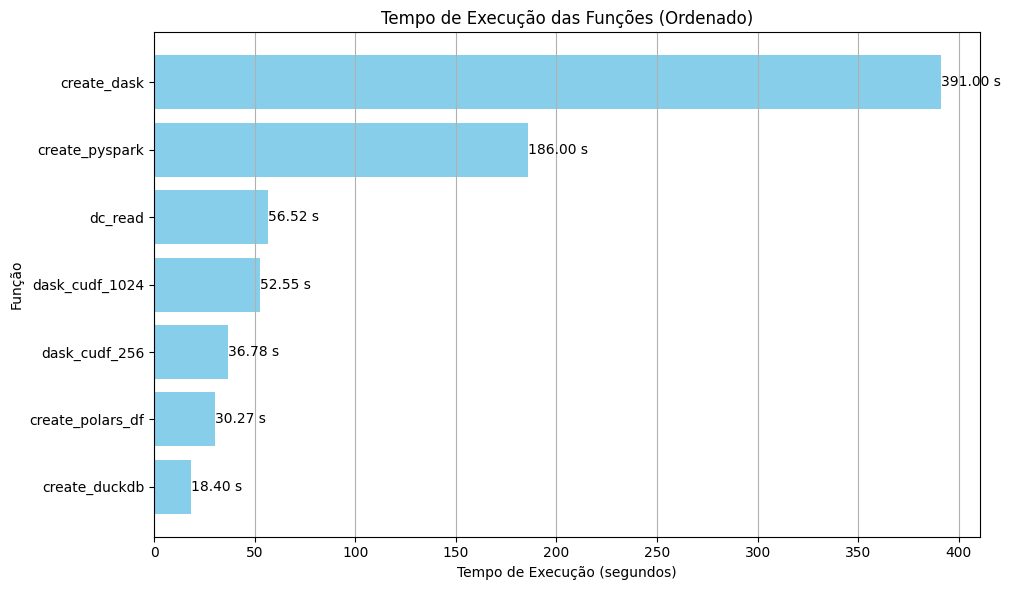

In [24]:
import csv
import matplotlib.pyplot as plt

# Leitura dos dados do arquivo CSV
dados = []

with open('data/tempos_execucao.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        nome_funcao = row[0]
        tempo = row[1].split()  # Separa minutos e segundos
        if len(tempo) == 2 and tempo[1] == 'segundos':  # Se houver apenas segundos
            tempo_total = float(tempo[0])
        elif len(tempo) == 4:  # Se houver minutos e segundos
            minutos = float(tempo[0])
            segundos = float(tempo[2])
            tempo_total = minutos * 60 + segundos  # Converte minutos para segundos
        else:
            raise ValueError(f'Formato de tempo inválido: {row[1]}')
        dados.append((nome_funcao, tempo_total))

# Ordena os dados pelo tempo de execução
dados_ordenados = sorted(dados, key=lambda x: x[1])

# Extrai os nomes das funções e os tempos de execução ordenados
nomes_funcoes_ordenados = [item[0] for item in dados_ordenados]
tempos_execucao_ordenados = [item[1] for item in dados_ordenados]

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.barh(nomes_funcoes_ordenados, tempos_execucao_ordenados, color='skyblue')
plt.xlabel('Tempo de Execução (segundos)')
plt.ylabel('Função')
plt.title('Tempo de Execução das Funções (Ordenado)')
plt.grid(axis='x')
plt.tight_layout()

# Adicionando os valores nas barras
for i, valor in enumerate(tempos_execucao_ordenados):
    plt.text(valor, i, f'{valor:.2f} s', va='center')

# Exibindo o gráfico
plt.show()


In [ ]:
<a id="ancora01"></a>

In [ ]:
<a id="ancora02"></a>

In [ ]:
<a id="ancora03"></a>

In [ ]:
<a id="ancora04"></a>

In [ ]:
<a id="ancora05"></a>

In [ ]:
<a id="ancora06"></a>

In [ ]:
<a id="ancora07"></a>

In [ ]:
<a id="ancora08"></a>

In [ ]:
<a id="ancora09"></a>

In [ ]:
<a id="ancora10"></a>

In [ ]:
<a id="ancora11"></a>

In [ ]:
<a id="ancora12"></a>

In [ ]:
<a id="ancora13"></a>

In [ ]:
<a id="ancora14"></a>

In [ ]:
<a id="ancora15"></a>

In [ ]:
<a id="ancora16"></a>

In [ ]:
<a id="ancora17"></a>

In [ ]:
<a id="ancora18"></a>

In [ ]:
<a id="ancora19"></a>

In [ ]:
<a id="ancora20"></a>